Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  

# **Customer Churn Analysis Using Regression Algorithms**

You are the Data Scientist at a telecom company “Neo” whose customers are churning out to
its competitors. You have to analyse the data of your company and find insights and stop your
customers from churning out to other telecom companies.

## **1. Import Libraries & Check Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, mean_absolute_error
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('customer churn.csv')

In [ ]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.size

147903

## **2. EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

## **3. Data Cleaning**

* **Duplicates**

In [ ]:
data.duplicated().sum()

0

* **Missing Data**

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* **Outliers**

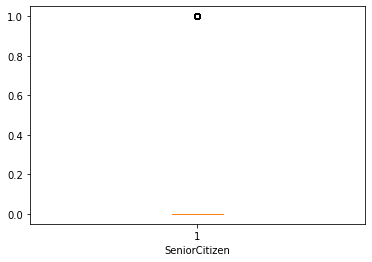

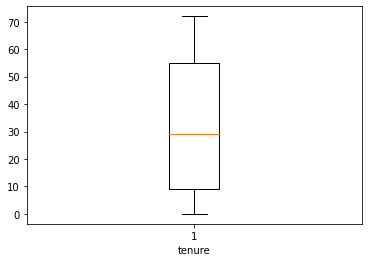

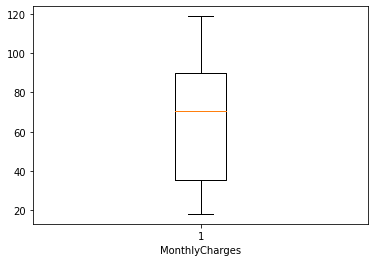

In [ ]:
for i in data.columns:
  if data[i].dtypes != object:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

## **4. Tasks**

### **4.1 Data Manipulation:**

1. Extract the 5th column & store it in ‘customer_5’
2. Extract the 15th column & store it in ‘customer_15’
3. Extract all the male senior citizens whose Payment Method is Electronic check &
store the result in ‘senior_male_electronic’
4. Extract all those customers whose tenure is greater than 70 months or their
Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
5. Extract all the customers whose Contract is of two years, payment method is Mailed
check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
6. Extract 333 random records from the customer_churn dataframe& store the result in
‘customer_333’
7. Get the count of different levels from the ‘Churn’ column

1. **Extract the 5th column & store it in ‘customer_5’**

---



In [ ]:
customer_5 = data.iloc[:,4]
customer_5.sample(2)

719     No
1542    No
Name: Dependents, dtype: object

2. **Extract the 15th column & store it in ‘customer_15’**

---



In [ ]:
customer_15 = data.iloc[:,14]
customer_15.sample(2)

2229    No
878     No
Name: StreamingMovies, dtype: object

**Important Note**

In [ ]:
#To check Index of Columns
pp = list(data.columns)
for x,y in enumerate(pp):
  print(x,y)

3. **Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’**

---



In [ ]:
senior_male_electronics = data[(data['gender'] == 'Male') & (data['SeniorCitizen'] == 1) &
                               (data['PaymentMethod'] == 'Electronic check')]

senior_male_electronics.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
2167,9061-TIHDA,Male,1,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,95.25,1233.65,Yes,No,Yes
1285,9134-CEQMF,Male,1,Yes,No,7,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,89.50,676.7,Yes,No,Yes
1976,9497-QCMMS,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,93.55,93.55,Yes,No,Yes


4. **Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’**

---



In [ ]:
customer_total_tenure = data[(data['tenure']> 70) | (data['MonthlyCharges']>100)]
customer_total_tenure.sample(2)

5. **Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’**

In [ ]:
two_mail_yes = data[(data['Contract'] == 'Two year') & (data['PaymentMethod'] == 'Mailed check') & (data['Churn'] =='Yes')]
two_mail_yes.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,Yes,Mailed check,24.5,740.3,Yes,Yes,No internet service
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,No,Two year,Yes,Mailed check,95.5,4627.85,Yes,Yes,No


6. **Extract 333 random records from the customer_churn dataframe& store the result in
‘customer_333’**

In [ ]:
customer_333 = data.sample(333)
customer_333.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
2993,2239-CFOUJ,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.40,20.4,No,Yes,No internet service
3487,9257-AZMTZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.10,1078.75,No,Yes,No internet service
116,9560-BBZXK,Female,0,No,No,36,No,No phone service,DSL,Yes,...,No,No,Two year,No,Bank transfer (automatic),31.05,1126.35,No,No,No
1501,5014-GSOUQ,Male,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65,No,No,No internet service
826,3643-AHCFP,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.60,644.35,Yes,No,Yes


7. **Get the count of different levels from the ‘Churn’ column**

In [ ]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### **4.2 Data Visualization:**

1. Build a bar-plot for the ’InternetService’ column:
  * Set x-axis label to ‘Categories of Internet Service’
  * Set y-axis label to ‘Count of Categories’
  * Set the title of plot to be ‘Distribution of Internet Service’
  * Set the color of the bars to be ‘orange’
2. Build a histogram for the ‘tenure’ column:
  * Set the number of bins to be 30
  * Set the color of the bins to be ‘green’
  * Assign the title ‘Distribution of tenure’
3. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
the y-axis & ‘tenure’ to the ‘x-axis’:
  * Assign the points a color of ‘brown’
  * Set the x-axis label to ‘Tenure of customer’
  * Set the y-axis label to ‘Monthly Charges of customer’
  * Set the title to ‘Tenure vs Monthly Charges’
4. Build a box-plot between ‘tenure’ & ‘Contract’.
  * Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

  1. **Build a bar-plot for the ’InternetService’ column:**
* Set x-axis label to ‘Categories of Internet Service’
* Set y-axis label to ‘Count of Categories’
* Set the title of plot to be ‘Distribution of Internet Service’
* Set the color of the bars to be ‘orange’

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  

In [ ]:
x = data.InternetService.value_counts().index
y = data.InternetService.value_counts()

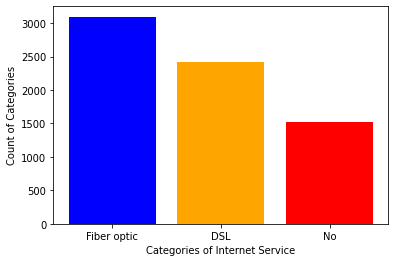

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.bar(x,y, color = ['blue', 'orange', 'red'])
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.show()
plt.tight_layout();

  2. **Build a histogram for the ‘tenure’ column:**
* Set the number of bins to be 30
* Set the color of the bins to be ‘green’
* Assign the title ‘Distribution of tenure’

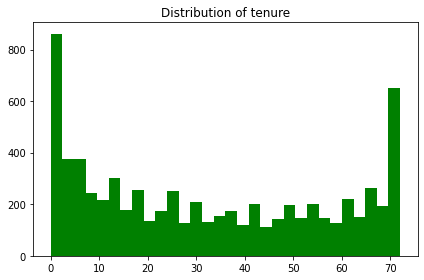

In [ ]:
plt.title('Distribution of tenure')
plt.hist(data.tenure, bins = 30, color = 'green')
plt.tight_layout();

  3. **Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
the y-axis & ‘tenure’ to the ‘x-axis’:**

---


  * Assign the points a color of ‘brown’
  * Set the x-axis label to ‘Tenure of customer’
  * Set the y-axis label to ‘Monthly Charges of customer’
  * Set the title to ‘Tenure vs Monthly Charges’

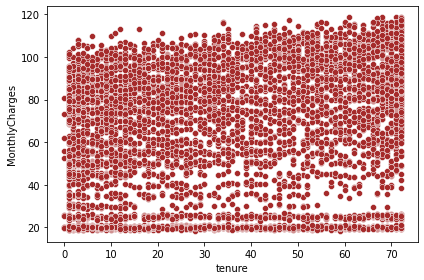

In [ ]:
plt.title = 'Tenure vs Monthly Charges'
sns.scatterplot(y = 'MonthlyCharges', x = 'tenure', data = data, color = 'brown')
plt.xlabel = 'Tenure of customer'
plt.ylabel = 'Monthly Charges of customer'
plt.tight_layout()
plt.show();

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


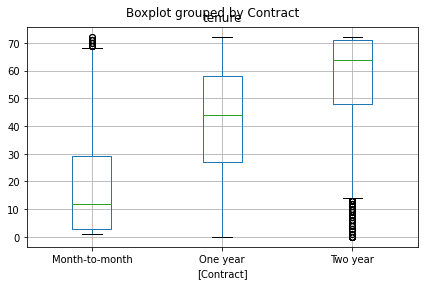

In [ ]:
data.boxplot('tenure',by=['Contract'])
plt.tight_layout()

  4. **Build a box-plot between ‘tenure’ & ‘Contract’.**

---

* Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

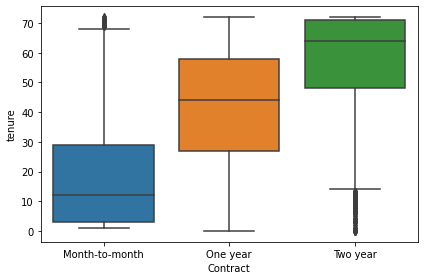

In [ ]:
sns.boxplot(x = 'Contract' , y = 'tenure', data = data)
plt.tight_layout();

* **Note**

`Boxplot is an in-built function of plot`

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


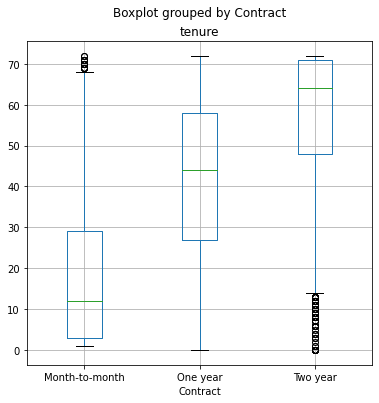

In [ ]:
# We can play around with Boxplot

data.boxplot(column = 'tenure', by='Contract', figsize = (6,6));

### **4.3. Linear Regression:**

**Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
independent variable is ‘tenure’**

---


1. Divide the dataset into train and test sets in 70:30 ratio.
2. Build the model on train set and predict the values on test set
3. After predicting the values, find the root mean square error
4. Find out the error in prediction & store the result in ‘error’
5. Find the root mean square error

* **Split Data**

In [ ]:
#Please Note to convert 1D Array into 2D use double Square Brackets

y = data[['MonthlyCharges']]
X = data[['tenure']]

In [ ]:
y.shape

(7043, 1)

In [ ]:
X.shape

(7043, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

* **Model Building**

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
Predictions = LR.predict(X_test)

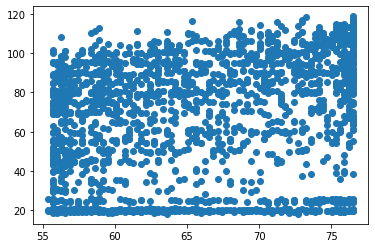

In [ ]:
plt.scatter(Predictions, y_test);

* **Model Evaluation**

In [ ]:
LR.intercept_

array([55.37598517])

In [ ]:
LR.coef_

array([[0.29341636]])

In [ ]:
MAE = mean_absolute_error(y_test, Predictions)
MAE

25.651705933984932

In [ ]:
Variance = mean_squared_error(y_test, Predictions)  #less MSE = Good Model | 0 MSE = Perfect Model
Variance

864.0415701364655

In [ ]:
Standard_Deviation = np.sqrt(mean_squared_error(y_test, Predictions))
Standard_Deviation

29.394584027273893

**r2 score** = How much predicted scores match actual data points

In [ ]:
r2_score(y_test, Predictions) #Goodness of Fit is preffered for Multiple linear regression

#Accuracy score is used for Logistic Regression

0.069470028128085

* **OLS Method**

`Useful Method for Logistic Regression with Muti Independent Variables`

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.OLS(y_train, X_train).fit()
X.summary()

### **4.4. Logistic Regression:**

**A. Build a simple logistic regression model where dependent variable is ‘Churn’ &
independent variable is ‘MonthlyCharges’**

1. Divide the dataset in 65:35 ratio
2. Build the model on train set and predict the values on test set
3. Build the confusion matrix and get the accuracy score

* **Data Split**

In [ ]:
y = data[['Churn']]
x = data[['MonthlyCharges']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state=0)

* **Building Model**

In [ ]:
LM = LogisticRegression()

In [ ]:
LM.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = LM.predict(x_test)

* **Evaluating Model**

In [ ]:
classification_report(predictions, y_test) #Gives report of Accuracy, Precision, Recall, F1-Score

'              precision    recall  f1-score   support\n\n          No       1.00      0.74      0.85      2466\n         Yes       0.00      0.00      0.00         0\n\n    accuracy                           0.74      2466\n   macro avg       0.50      0.37      0.42      2466\nweighted avg       1.00      0.74      0.85      2466\n'

In [ ]:
confusion_matrix(predictions, y_test)

array([[1815,  651],
       [   0,    0]])

In [ ]:
accuracy_score(predictions, y_test)

0.7360097323600974

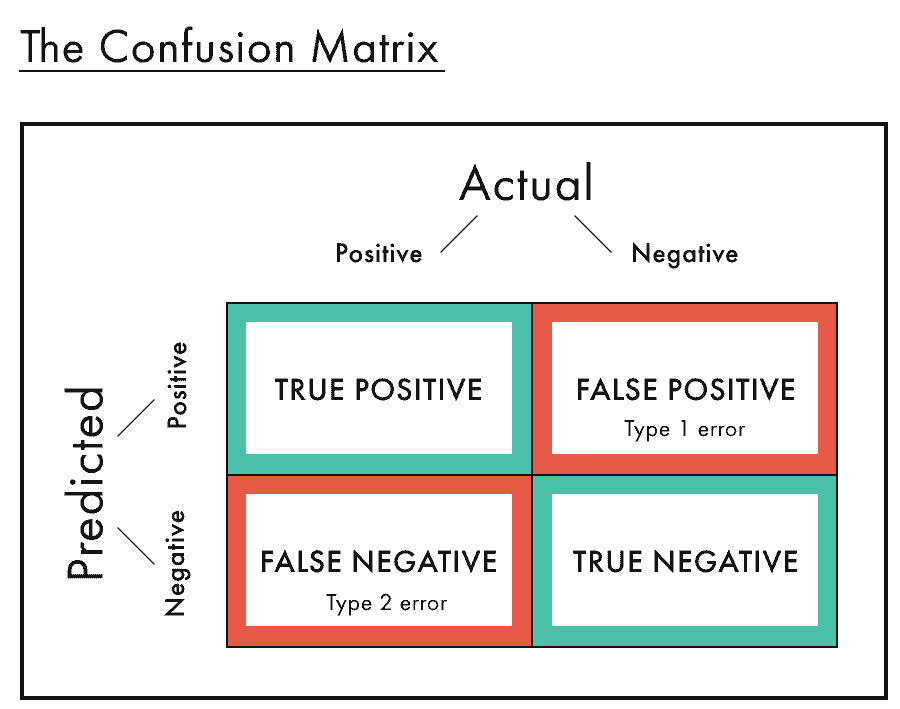

**B. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
independent variables are ‘tenure’ & ‘MonthlyCharges’**
1. Divide the dataset in 80:20 ratio
2. Build the model on train set and predict the values on test set
3. Build the confusion matrix and get the accuracy score

* **Data Split**

In [ ]:
y = data[['Churn']]
x = data[['MonthlyCharges', 'tenure']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=0)

* **Building Model**

In [ ]:
LM = LogisticRegression()

In [ ]:
LM.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = LM.predict(x_test)

* **Model Evaluation**

In [ ]:
accuracy_score(predictions,y_test)

0.7735982966643009

In [ ]:
confusion_matrix(predictions,y_test)

array([[934, 212],
       [107, 156]])

In [ ]:
classification_report(predictions,y_test)

'              precision    recall  f1-score   support\n\n          No       0.90      0.82      0.85      1146\n         Yes       0.42      0.59      0.49       263\n\n    accuracy                           0.77      1409\n   macro avg       0.66      0.70      0.67      1409\nweighted avg       0.81      0.77      0.79      1409\n'

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  